1.Choose the number of clusters you want — that’s your 'K'.

2.Randomly place K points in the data space — these are called centroids.

3.Each data point is assigned to the nearest centroid, forming clusters.

4.The centroids are then moved to the average position of all the points in their cluster.

5.Steps 3 and 4 repeat until the positions of the centroids no longer change.

1. Importing Libraries
First, we import the necessary Python libraries for data manipulation, visualization, and clustering.



In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

2. Loading the Dataset
We will use the Iris dataset, which contains information about 150 iris flowers, including measurements of their sepal and petal lengths and widths. Let's load the dataset and take a look at it.

In [ ]:
# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Display the first few rows of the dataset
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


3. Understanding the Data
Let’s check the structure of the dataset, including data types and basic statistics, to understand the dataset better.

In [ ]:
# Check for missing values and data types
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


4. Selecting Features for Clustering
We will use only two features for simplicity:

Petal length (cm)

Petal width (cm)

This will allow us to visualize the clusters in a 2D scatter plot.

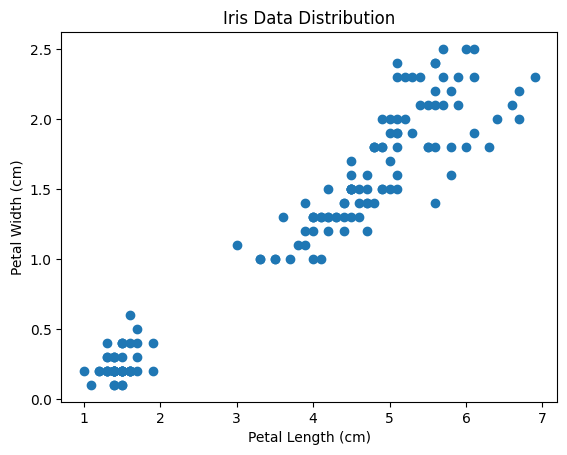

In [ ]:
# Select features: Petal Length and Petal Width
X = data[['petal length (cm)', 'petal width (cm)']]

# Visualize the data distribution
plt.scatter(X['petal length (cm)'], X['petal width (cm)'])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Data Distribution')
plt.show()

5. Preprocessing Data
Since K-Means uses distance-based calculations, we need to scale the features. Scaling ensures that all features contribute equally to the distance computations.

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of scaled data
pd.DataFrame(X_scaled, columns=['Petal Length (scaled)', 'Petal Width (scaled)'])

,Petal Length (scaled),Petal Width (scaled)
0,-1.340227,-1.315444
1,-1.340227,-1.315444
2,-1.397064,-1.315444
3,-1.283389,-1.315444
4,-1.340227,-1.315444
...,...,...
145,0.819596,1.448832
146,0.705921,0.922303
147,0.819596,1.053935
148,0.933271,1.448832


6. Finding the Optimal Number of Clusters (Elbow Method)
We’ll use the elbow method to find the best value for k, the number of clusters.

In [ ]:
# Use the elbow method to determine the optimal number of clusters
inertia = []
K=range(1,11)
for k in K:      #2nd loop k=2
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    print(inertia)

[300.0000000000001]
[300.0000000000001, 54.16878133149559]
[300.0000000000001, 54.16878133149559, 18.026962612544075]
[300.0000000000001, 54.16878133149559, 18.026962612544075, 12.53177978807975]
[300.0000000000001, 54.16878133149559, 18.026962612544075, 12.53177978807975, 10.1290249492043]
[300.0000000000001, 54.16878133149559, 18.026962612544075, 12.53177978807975, 10.1290249492043, 7.187603589633756]
[300.0000000000001, 54.16878133149559, 18.026962612544075, 12.53177978807975, 10.1290249492043, 7.187603589633756, 6.270609649558733]
[300.0000000000001, 54.16878133149559, 18.026962612544075, 12.53177978807975, 10.1290249492043, 7.187603589633756, 6.270609649558733, 5.142546592935058]
[300.0000000000001, 54.16878133149559, 18.026962612544075, 12.53177978807975, 10.1290249492043, 7.187603589633756, 6.270609649558733, 5.142546592935058, 4.6237737977871385]
[300.0000000000001, 54.16878133149559, 18.026962612544075, 12.53177978807975, 10.1290249492043, 7.187603589633756, 6.270609649558733,

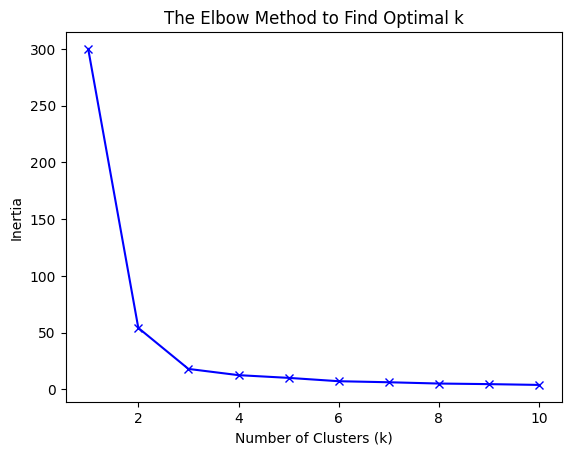

In [ ]:
# Plot the elbow curve
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method to Find Optimal k')
plt.show()

7. Applying K-Means Clustering
Based on the elbow method, let’s choose an optimal k (e.g., k=3, which aligns with the three species of iris flowers) and apply K-Means clustering.

In [ ]:
# Train the K-Means model with the optimal number of clusters

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataset
data['Cluster'] = clusters

# Display the first few rows with cluster labels
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


8. Visualizing the Clusters
We’ll visualize the clustering results. Each cluster will be represented by a different color, and the centroids will be marked as red crosses.

In [ ]:
X_scaled[:,0]

array([-1.34022653, -1.34022653, -1.39706395, -1.2833891 , -1.34022653,
       -1.16971425, -1.34022653, -1.2833891 , -1.34022653, -1.2833891 ,
       -1.2833891 , -1.22655167, -1.34022653, -1.51073881, -1.45390138,
       -1.2833891 , -1.39706395, -1.34022653, -1.16971425, -1.2833891 ,
       -1.16971425, -1.2833891 , -1.56757623, -1.16971425, -1.05603939,
       -1.22655167, -1.22655167, -1.2833891 , -1.34022653, -1.22655167,
       -1.22655167, -1.2833891 , -1.2833891 , -1.34022653, -1.2833891 ,
       -1.45390138, -1.39706395, -1.34022653, -1.39706395, -1.2833891 ,
       -1.39706395, -1.39706395, -1.39706395, -1.22655167, -1.05603939,
       -1.34022653, -1.22655167, -1.34022653, -1.2833891 , -1.34022653,
        0.53540856,  0.42173371,  0.64908342,  0.13754657,  0.47857113,
        0.42173371,  0.53540856, -0.26031542,  0.47857113,  0.08070915,
       -0.14664056,  0.25122143,  0.13754657,  0.53540856, -0.08980313,
        0.36489628,  0.42173371,  0.194384  ,  0.42173371,  0.08

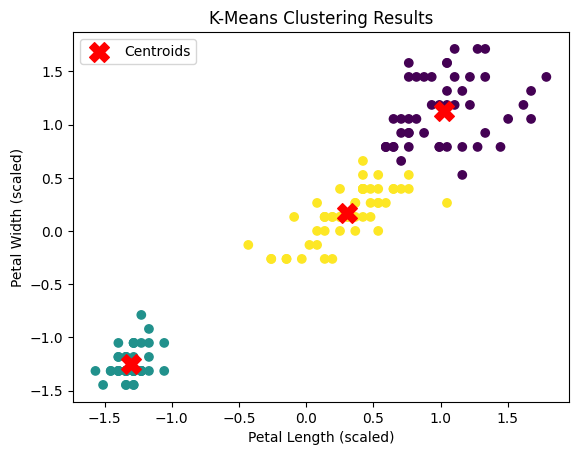

In [ ]:
# Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Petal Length (scaled)')
plt.ylabel('Petal Width (scaled)')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

9. Evaluating the Model
We evaluate the clustering using the inertia and silhouette score to determine how well the data has been clustered.

In [ ]:
# Calculate inertia and silhouette score
from sklearn.metrics import silhouette_score

inertia = kmeans.inertia_
silhouette_avg = silhouette_score(X_scaled, clusters)

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {silhouette_avg}")

Inertia: 18.026962612544075
Silhouette Score: 0.6741313114151009
